# Week 02. Tokens and N-Grams

Sequencing Legal DNA: NLP for Law and Political Economy<br>
Elliott Ash, ETH Zurich

In [1]:
# set random seed
import numpy as np
np.random.seed(4)

In [2]:
#setup
import warnings; warnings.simplefilter('ignore')
%matplotlib inline
import pandas as pd
import nltk

In [3]:
# load cleaned data from lesson 1.
df = pd.read_pickle('sc_cases_cleaned.pkl',compression='gzip')
df.columns

Index(['case_name', 'opinion_type', 'date_standard', 'authorship',
       'x_republican', 'maj_judges', 'dissent_judges', 'topic_id',
       'cite_count', 'opinion_text', 'year', 'log_cite_count'],
      dtype='object')

# Basic Pre-Processing and Tokenization

In [4]:
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."

**Sentence Tokenization**

**NLTK has a fast implementation that makes errors.**

In [5]:
from nltk import sent_tokenize
sentences = sent_tokenize(text) # split document into sentences
print(sentences)

['Prof. Zurich hailed from Zurich.', 'She got 3 M.A.', "'s from ETH."]


**spacy works better.**

**Install spacy and the English model if you have not already.**

In [6]:
# !pip install spacy
# !python -m spacy download en_core_web_sm

In [7]:
# 
import spacy
nlp = spacy.load('en_core_web_sm')
doc = nlp(text)
sentences = list(doc.sents)
print(sentences)

[Prof. Zurich hailed from Zurich., She got 3 M.A.'s from ETH.]


**Removing capitalization.**

In [8]:
# Capitalization
text_lower = text.lower() # go to lower-case

In [9]:
#####
# Punctuation
#####

# recipe for fast punctuation removal
from string import punctuation
print ("punctuation:", punctuation)
punc_remover = str.maketrans('','',punctuation) 
text_nopunc = text_lower.translate(punc_remover)
print(text_nopunc)

punctuation: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
prof zurich hailed from zurich she got 3 mas from eth


In [10]:
# Tokens
tokens = text_nopunc.split() # splits a string on white space
print(tokens)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [11]:
# Numbers
# remove numbers (keep if not a digit)
no_numbers = [t for t in tokens if not t.isdigit()]
# keep if not a digit, else replace with "#"
norm_numbers = [t if not t.isdigit() else '#' 
                for t in tokens ]
print(no_numbers )
print(norm_numbers)

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'mas', 'from', 'eth']
['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', '#', 'mas', 'from', 'eth']


In [12]:
# Stopwords
from nltk.corpus import stopwords
stoplist = stopwords.words('english') 
print ("stop words:", stoplist)
# keep if not a stopword
nostop = [t for t in norm_numbers if t not in stoplist]
print(nostop)

stop words: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so

In [13]:
# scikit-learn stopwords
# depending on sklearn version, for sklearn==0.24.1, stop_words are here
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS as stop_words
sorted(list(stop_words))[:20]

# in older versions, one may hvae to import it like this
# from sklearn.feature_extraction import stop_words
# sorted(list(stop_words.ENGLISH_STOP_WORDS))[:20]

['a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst']

In [14]:
# spacy stopwords
sorted(list(nlp.Defaults.stop_words))[:20]

["'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also']

In [15]:
# Stemming
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english') # snowball stemmer, english
# remake list of tokens, replace with stemmed versions
tokens_stemmed = [stemmer.stem(t) for t in tokens]
print(tokens_stemmed)

['prof', 'zurich', 'hail', 'from', 'zurich', 'she', 'got', '3', 'mas', 'from', 'eth']


In [16]:
stemmer = SnowballStemmer('german') # snowball stemmer, german
print(stemmer.stem("Autobahnen"))

autobahn


In [17]:
# Lemmatizing
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()
wnl.lemmatize('corporation'), wnl.lemmatize('corporations')

('corporation', 'corporation')

Let's wrap it into a recipe.

In [18]:
from string import punctuation
translator = str.maketrans('','',punctuation) 
from nltk.corpus import stopwords
stoplist = set(stopwords.words('english'))
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def normalize_text(doc):
    "Input doc and return clean list of tokens"
    doc = doc.replace('\r', ' ').replace('\n', ' ')
    lower = doc.lower() # all lower case
    nopunc = lower.translate(translator) # remove punctuation
    words = nopunc.split() # split into tokens
    nostop = [w for w in words if w not in stoplist] # remove stopwords
    no_numbers = [w if not w.isdigit() else '#' for w in nostop] # normalize numbers
    stemmed = [stemmer.stem(w) for w in no_numbers] # stem each word
    return stemmed

And apply it to the Supreme Court Cases Corpus.

In [19]:
df['tokens_cleaned'] = df['opinion_text'].apply(normalize_text)
df['tokens_cleaned']

0      [justic, ginsburg, deliv, opinion, court, moti...
1      [justic, steven, deliv, opinion, court, unit, ...
2      [justic, oconnor, deliv, opinion, court, confr...
4      [justic, kennedi, deliv, opinion, court, state...
5      [justic, kennedi, deliv, opinion, court, case,...
                             ...                        
815    [justic, breyer, deliv, opinion, court, appeal...
816    [justic, souter, deliv, opinion, court, questi...
817    [justic, scalia, deliv, opinion, court, case, ...
818    [justic, thoma, deliv, opinion, court, control...
819    [justic, oconnor, deliv, opinion, courtthi, ca...
Name: tokens_cleaned, Length: 768, dtype: object

**Shortcut: `gensim.simple_preprocess`.**

In [20]:
from gensim.utils import simple_preprocess
print(simple_preprocess(text))

['prof', 'zurich', 'hailed', 'from', 'zurich', 'she', 'got', 'from', 'eth']


In [21]:
from collections import Counter
print(Counter(simple_preprocess(text)))

Counter({'zurich': 2, 'from': 2, 'prof': 1, 'hailed': 1, 'she': 1, 'got': 1, 'eth': 1})


Now let's `simple_preprocess` on the Supreme Court corpus.

In [22]:
df['tokens_simple'] = df['opinion_text'].apply(simple_preprocess)
df['tokens_simple']

0      [justice, ginsburg, delivered, the, opinion, o...
1      [justice, stevens, delivered, the, opinion, of...
2      [justice, connor, delivered, the, opinion, of,...
4      [justice, kennedy, delivered, the, opinion, of...
5      [justice, kennedy, delivered, the, opinion, of...
                             ...                        
815    [justice, breyer, delivered, the, opinion, of,...
816    [justice, souter, delivered, the, opinion, of,...
817    [justice, scalia, delivered, the, opinion, of,...
818    [justice, thomas, delivered, the, opinion, of,...
819    [justice, connor, delivered, the, opinion, of,...
Name: tokens_simple, Length: 768, dtype: object

**[flair NLP](https://github.com/flairNLP/flair)**

In [23]:
!pip install flair
# simple tokenization
from flair.data import Sentence
sentence = Sentence('The grass is green.')
print(sentence)

for token in sentence:
        print (token)

Sentence: "The grass is green ."   [− Tokens: 5]
Token: 1 The
Token: 2 grass
Token: 3 is
Token: 4 green
Token: 5 .


## Tagging Parts of Speech

In [24]:
text = 'Science cannot solve the ultimate mystery of nature. And that is because, in the last analysis, we ourselves are a part of the mystery that we are trying to solve.'

#nltk.download('averaged_perceptron_tagger')
from nltk.tag import perceptron 
from nltk import word_tokenize
tagger = perceptron.PerceptronTagger()
tokens = word_tokenize(text)
tagged_sentence = tagger.tag(tokens)
tagged_sentence

[('Science', 'NN'),
 ('can', 'MD'),
 ('not', 'RB'),
 ('solve', 'VB'),
 ('the', 'DT'),
 ('ultimate', 'JJ'),
 ('mystery', 'NN'),
 ('of', 'IN'),
 ('nature', 'NN'),
 ('.', '.'),
 ('And', 'CC'),
 ('that', 'DT'),
 ('is', 'VBZ'),
 ('because', 'RB'),
 (',', ','),
 ('in', 'IN'),
 ('the', 'DT'),
 ('last', 'JJ'),
 ('analysis', 'NN'),
 (',', ','),
 ('we', 'PRP'),
 ('ourselves', 'PRP'),
 ('are', 'VBP'),
 ('a', 'DT'),
 ('part', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('mystery', 'NN'),
 ('that', 'IN'),
 ('we', 'PRP'),
 ('are', 'VBP'),
 ('trying', 'VBG'),
 ('to', 'TO'),
 ('solve', 'VB'),
 ('.', '.')]

Plot nouns and adjectives over time.

<AxesSubplot:xlabel='year'>

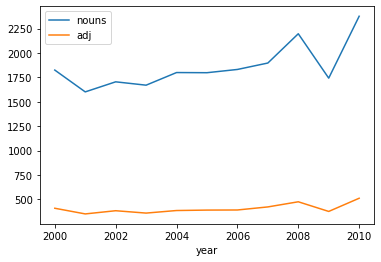

In [25]:
from collections import Counter
from nltk import word_tokenize

def get_nouns_adj(snippet):
    tags = [x[1] for x in tagger.tag(word_tokenize(snippet))]
    num_nouns = len([t for t in tags if t[0] == 'N'])
    num_adj = len([t for t in tags if t[0] == 'J'])
    return num_nouns, num_adj

df['nouns'], df['adj'] = zip(*df['opinion_text'].map(get_nouns_adj))
df.groupby('year')[['nouns','adj']].mean().plot()

In [26]:
# Get list of nouns, adjectives, and verbs from WordNet
# nltk.download('wordnet')
from nltk import wordnet as wn

nouns = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('n')])

adjectives = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('a')])

verbs = set([x.lemma_names()[0].lower() 
             for x in wn.wordnet.all_synsets('v')])

# Corpus Prep with spaCy

Get spacy documents for each speech and add to dataframe. This is quicker than iterating over the dataframe with `iterrows()`, but slower than a parallelized solution. It will take a few minutes for a whole corpus.

In [27]:
dfs = df.sample(10)
dfs['doc'] = dfs['opinion_text'].apply(nlp)

In [28]:
# The spacy model already gives you sentences and tokens.
# For example:
sent1 = list(dfs['doc'].iloc[0].sents)[1]
sent1 # sentence

The Railroad Revitalization and Regulatory Reform Act of 1976 prohibits States from discriminating against railroads by taxing railroad property more heavily than other commercial property in the State.  

In [29]:
# tokens
list(sent1) 

[The,
 Railroad,
 Revitalization,
 and,
 Regulatory,
 Reform,
 Act,
 of,
 1976,
 prohibits,
 States,
 from,
 discriminating,
 against,
 railroads,
 by,
 taxing,
 railroad,
 property,
 more,
 heavily,
 than,
 other,
 commercial,
 property,
 in,
 the,
 State,
 .,
  ]

In [30]:
# lemmas
[x.lemma_ for x in sent1]

['the',
 'Railroad',
 'Revitalization',
 'and',
 'Regulatory',
 'Reform',
 'Act',
 'of',
 '1976',
 'prohibit',
 'state',
 'from',
 'discriminate',
 'against',
 'railroad',
 'by',
 'tax',
 'railroad',
 'property',
 'more',
 'heavily',
 'than',
 'other',
 'commercial',
 'property',
 'in',
 'the',
 'State',
 '.',
 ' ']

In [31]:
# POS tags
[x.tag_ for x in sent1]

['DT',
 'NNP',
 'NNP',
 'CC',
 'NNP',
 'NNP',
 'NNP',
 'IN',
 'CD',
 'VBZ',
 'NNS',
 'IN',
 'VBG',
 'IN',
 'NNS',
 'IN',
 'VBG',
 'NN',
 'NN',
 'RBR',
 'RB',
 'IN',
 'JJ',
 'JJ',
 'NN',
 'IN',
 'DT',
 'NNP',
 '.',
 '_SP']

Analyzing a Corpus with spaCy data

In [32]:
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x)))
dfs['num_words'] = dfs['doc'].apply(lambda x: len(list(x.sents)))


print(len(tokens),'words in corpus.')
words_per_sent = len(tokens) / len(sentences)
print(words_per_sent,'words per sentence.')

35 words in corpus.
17.5 words per sentence.


**pre-processing with spacy**

In [33]:
def tokenize(x, nlp):
    # lemmatize and lowercase without stopwords, punctuation and numbers
    return [w.lemma_.lower() for w in nlp(x) if not w.is_stop and not w.is_punct and not w.is_digit]
tokenize(text, nlp)

['science',
 'solve',
 'ultimate',
 'mystery',
 'nature',
 'analysis',
 'mystery',
 'try',
 'solve']

# N-grams

In [34]:
from nltk import ngrams
from collections import Counter

# get n-gram counts for 10 documents
grams = []
for i, row in df.iterrows():
    tokens = row['opinion_text'].lower().split() # get tokens
    for n in range(2,4):
        grams += list(ngrams(tokens,n)) # get bigrams, trigrams, and quadgrams
    if i > 50:
        break
Counter(grams).most_common()[:8]  # most frequent n-grams

[(('of', 'the'), 2503),
 (('l.', 'ed.'), 2197),
 (('s.', 'ct.'), 1898),
 (('ed.', '2d'), 1618),
 (('l.', 'ed.', '2d'), 1618),
 (('that', 'the'), 1200),
 (('to', 'the'), 1077),
 (('in', 'the'), 951)]

# Tokenizers

In [35]:
# Counter is a quick pure-python solution.
from collections import Counter
freqs = Counter(tokens)
freqs.most_common()[:20]

[('the', 398),
 ('of', 295),
 ('to', 148),
 ('a', 126),
 ('that', 110),
 ('supervised', 95),
 ('and', 78),
 ('in', 76),
 ('release', 71),
 ('is', 65),
 ('term', 64),
 ('§', 56),
 ('v.', 49),
 ('for', 45),
 ('at', 43),
 ('united', 42),
 ('not', 41),
 ('it', 41),
 ('states', 38),
 ('as', 38)]

Usually we use scikit-learn's vectorizer.

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                        max_df=.9,  
                        max_features=1000,
                        stop_words='english',
                        ngram_range=(1,3))
X = vec.fit_transform(df['opinion_text'])

# save the vectors
pd.to_pickle(X,'X.pkl')

# save the vectorizer 
# (so you can transform other documents, 
# also for the vocab)
pd.to_pickle(vec, 'vec-3grams-1.pkl')

In [37]:
# tf-idf vectorizer up-weights rare/distinctive words
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X_tfidf = tfidf.fit_transform(df['opinion_text'])
pd.to_pickle(X_tfidf,'X_tfidf.pkl')

In [38]:
X_tfidf

<768x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 300968 stored elements in Compressed Sparse Row format>

**Make word cloud of common words by topic id.**

In [39]:
df['topic_id'].value_counts() 

1.0     217
8.0     153
2.0     117
9.0      90
3.0      53
10.0     49
4.0      24
5.0      18
12.0     14
7.0      14
6.0      12
11.0      5
13.0      2
Name: topic_id, dtype: int64

In [40]:
vocab = tfidf.get_feature_names()
vocab[:10], vocab[-10:]

(['000', '10', '100', '101', '102', '103', '103 ct', '104', '104 ct', '105'],
 ['waters',
  'way',
  'west',
  'word',
  'words',
  'work',
  'writ',
  'year',
  'years',
  'york'])

1


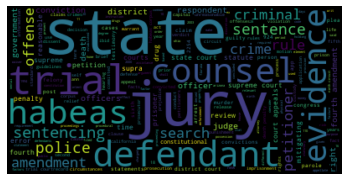

2


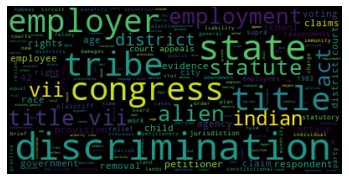

8


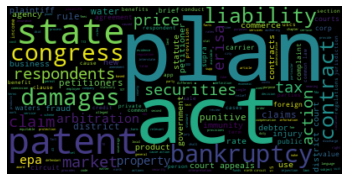

9


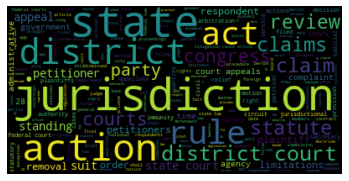

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for topic_id in [1,2,8,9]: 
    slicer = df['topic_id'] == topic_id
    f = X_tfidf[slicer.values]
    total_freqs = list(np.array(f.sum(axis=0))[0])
    fdict = dict(zip(vocab,total_freqs))
    # generate word cloud of words with highest counts
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()

**Make word cloud of common words by naive bayes topic ranking.**

In [42]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
# X is the data transformed by CountVectorizer above, y are the topic_ids
print (X.shape, df['topic_id'].astype(int))
nb.fit(X.todense(), df['topic_id'].astype(int))
df["topic_id"].describe()
print (nb.coef_.shape)

(768, 1000) 0       1
1       8
2       1
4      10
5       4
       ..
815     2
816     1
817     9
818     1
819     4
Name: topic_id, Length: 768, dtype: int64
(13, 1000)


1


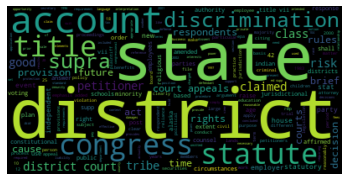

2


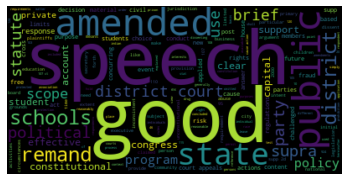

8


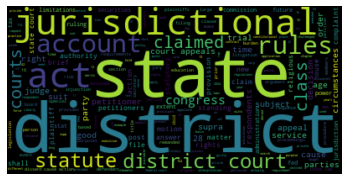

9


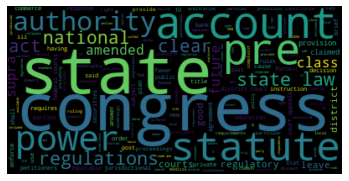

In [43]:
for topic_id in [1,2,8,9]: 
    # get feature coefficients for topic_id from naive bayes classifier
    f = nb.coef_[topic_id]
    fdict = dict(zip(vocab,f))
    # generate word cloud of words with highest feature coefficients
    wordcloud = WordCloud().generate_from_frequencies(fdict) 
    print(topic_id)
    plt.clf()
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.show()


**customer tokenizers and stemmers**

In [44]:
# hash vectorizer
from sklearn.feature_extraction.text import HashingVectorizer

hv = HashingVectorizer(n_features=10)
X_hash = hv.fit_transform(df['opinion_text'])
X_hash

<768x10 sparse matrix of type '<class 'numpy.float64'>'
	with 7680 stored elements in Compressed Sparse Row format>

In [45]:
# dict vectorizer
# from sklearn.feature_extraction import DictVectorizer
#TODO make this work
#dv = DictVectorizer()
#X_dv = dv.fit_transform(df['opinion_text'])
#X_dv


**debugging hashing vectorizer**

In [46]:
!pip install eli5
from eli5.sklearn import InvertableHashingVectorizer

ivec = InvertableHashingVectorizer(hv)
inverted_hv = ivec.fit(df['opinion_text'])
print ([i for i in inverted_hv.get_feature_names()])

[[{'name': 'with', 'sign': -1.0}, {'name': 'has', 'sign': -1.0}, {'name': 'united', 'sign': 1.0}, {'name': 'if', 'sign': 1.0}, {'name': 'other', 'sign': -1.0}, {'name': 'whether', 'sign': -1.0}, {'name': 'because', 'sign': 1.0}, {'name': 'when', 'sign': 1.0}, {'name': 'supra', 'sign': 1.0}, {'name': 'against', 'sign': 1.0}, {'name': 'claims', 'sign': -1.0}, {'name': 'before', 'sign': -1.0}, {'name': 'use', 'sign': 1.0}, {'name': 'justice', 'sign': 1.0}, {'name': 'rights', 'sign': -1.0}, {'name': 'authority', 'sign': 1.0}, {'name': 'fact', 'sign': 1.0}, {'name': 'reasonable', 'sign': -1.0}, {'name': 'property', 'sign': 1.0}, {'name': 'plan', 'sign': 1.0}, {'name': 'further', 'sign': 1.0}, {'name': 'supp', 'sign': -1.0}, {'name': 'tax', 'sign': -1.0}, {'name': 'required', 'sign': 1.0}, {'name': 'proceedings', 'sign': -1.0}, {'name': 'rather', 'sign': 1.0}, {'name': 'him', 'sign': -1.0}, {'name': 'appeal', 'sign': 1.0}, {'name': 'language', 'sign': 1.0}, {'name': 'used', 'sign': 1.0}, {'n

**hashing with keras**

In [47]:
!pip install tensorflow
!pip install keras
import tensorflow as tf
import keras
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."
n = 5 # num features
tf.keras.preprocessing.text.hashing_trick(
    text, n, hash_function=None,
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True, split=' '
)

[4, 2, 4, 3, 2, 3, 1, 2, 3, 2, 3, 3, 3]

**Collocations: Point-Wise Mutual Information.**

In [48]:
from operator import mul
from functools import reduce
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer('english')

def get_gmean(phrase, termfreqs):
    words = phrase.split('_')
    n = len(words)
    p = [termfreqs[w]**(1/n) for w in words]
    print (words, n, p)
    numerator = termfreqs[phrase]   
    denominator = reduce(mul, p)
    print (numerator, denominator)
    if denominator == 0:
        return 0
    gmean = numerator / denominator
    return gmean

**POS-filtered N-grams**

In [49]:
from collections import Counter

# Normalized Penn tags
tagdict = { 'NN':'N',
            'NNS':'N',
                                    
            'JJ':'A',
            'JJR':'A',
            'JJS':'A',
            'VBG':'A', # gerunds/participles treated like adjectives

            'RB':'A', # adverbs treated as adjectives
            'RBR':'A',
            'RBS':'A',
            'PDT':'A', # predeterminer            

            'VB':'V',
            'VBD':'V',
            'VBN':'V',
            'VBP':'V',
            'VBZ':'V',
            'MD': 'V', # modals treated as verbs
            'RP': 'V', # particles treated as verbs
            
            'DT':'D',
                        
            'IN':'P',
            'TO':'P',

            'CC': 'C'}

tagpatterns = {'A','N','V','P','C','D',
           'AN','NN', 'VN', 'VV', 
            #'NV',
            'VP',                                    
            'NNN','AAN','ANN','NAN','NPN',
            'VAN','VNN', 'AVN', 'VVN',
            'VPN', 'VDN', 
            #'ANV','NVV','VVV', 'NNV',
            'VVP','VAV','VVN',
            'NCN','VCV', 'ACA',  
            'PAN',
            'NCVN','ANNN','NNNN','NPNN', 'AANN' 'ANNN','ANPN','NNPN','NPAN', 
            'ACAN', 'NCNN', 'NNCN', 'ANCN', 'NCAN',
            'PDAN', 'PNPN',
            'VDNN', 'VDAN','VVDN'}

def count_pos_grams(sentence, max_phrase_length=4):
    sent_freq = Counter()
    tagwords = []
    for (word,tag) in tagger.tag(sentence):
        if tag in tagdict:
            normtag = tagdict[tag]
            stemmed = word.lower()#stemmer.stem(word)
            tagwords.append((stemmed,normtag))
        else:
            tagwords.append(None)
    for n in range(1,max_phrase_length+1):            
        rawgrams = ngrams(tagwords,n)
        for rawgram in rawgrams:
            # skip grams that have rare words
            if None in rawgram:
                continue
            gramtags = ''.join([x[1][0] for x in rawgram])
            if gramtags in tagpatterns:
                 # if tag sequence is allowed, add to counter
                gram = '_'.join([x[0] for x in rawgram])
                sent_freq[gram] += 1
    return sent_freq

In [50]:
max_phrase_length = 4
termfreqs = Counter()

for i, doc in dfs.iterrows():    
    termfreqs.update(count_pos_grams(nltk.word_tokenize(doc['opinion_text'])))
        


In [51]:
# filter out unigrams
grams = [x for x in termfreqs.most_common() if '_' in x[0]]
# make dataframe of geometric mean associations for each gram
gmeans = pd.DataFrame([(gram[0], get_gmean(gram[0],termfreqs)) for gram in grams],
              columns=['ngram','gmean'])
gmeans.sort_values('gmean',ascending=False)

['market', 'value'] 2 [7.3484692283495345, 7.810249675906654]
39 57.39337940912697
['true', 'market'] 2 [6.244997998398398, 7.3484692283495345]
30 45.89117562233506
['true', 'market', 'value'] 3 [3.3912114430141664, 3.7797631496846193, 3.936497183102173]
29 50.45792659458267
['would', 'be'] 2 [10.488088481701515, 16.0312195418814]
27 168.13684902483453
['has', 'been'] 2 [11.224972160321824, 7.416198487095663]
26 83.24662155306964
['may', 'be'] 2 [10.535653752852738, 16.0312195418814]
25 168.8993783292289
['clemency', 'proceedings'] 2 [7.0710678118654755, 8.48528137423857]
21 60.0
['should', 'be'] 2 [6.0, 16.0312195418814]
20 96.18731725128839
['must', 'be'] 2 [7.615773105863909, 16.0312195418814]
18 122.09013064126029
['based', 'on'] 2 [4.358898943540674, 15.427248620541512]
17 67.24581771381771
['“', 'process'] 2 [7.483314773547883, 7.745966692414834]
17 57.96550698475775
['held', 'that'] 2 [5.196152422706632, 24.43358344574123]
16 126.96062381699295
['can', 'be'] 2 [8.18535277187245,

['be', 'granted'] 2 [16.0312195418814, 4.795831523312719]
3 76.88302803610169
['unit', 'rule'] 2 [1.7320508075688772, 4.898979485566356]
3 8.48528137423857
['was', 'that'] 2 [12.767145334803704, 24.43358344574123]
3 311.94711090183216
['relied', 'on'] 2 [2.449489742783178, 15.427248620541512]
3 37.78888725538236
['used', 'by'] 2 [6.0, 16.792855623746664]
3 100.75713374248
['state', 'appraiser'] 2 [12.922847983320086, 3.3166247903554]
3 42.86023798347368
['reasoned', 'that'] 2 [1.7320508075688772, 24.43358344574123]
3 42.32020793899765
['clear', 'statement'] 2 [4.69041575982343, 2.8284271247461903]
3 13.266499161421601
['would', 'render'] 2 [10.488088481701515, 2.23606797749979]
3 23.45207879911715
['sought', 'to'] 2 [3.1622776601683795, 34.87119154832539]
3 110.27239001672179
['lead', 'to'] 2 [1.7320508075688772, 34.87119154832539]
3 60.398675482166
['factual', 'question'] 2 [3.3166247903554, 7.280109889280518]
3 24.14539293529927
['have', 'done'] 2 [11.045361017187261, 1.7320508075688

['refused', 'to'] 2 [1.4142135623730951, 34.87119154832539]
2 49.31531202375182
['bench', 'trial'] 2 [1.4142135623730951, 3.605551275463989]
2 5.099019513592785
['divided', 'panel'] 2 [1.4142135623730951, 2.0]
2 2.8284271247461903
['congressional', 'purpose'] 2 [3.872983346207417, 5.196152422706632]
2 20.12461179749811
['can', 'go'] 2 [8.18535277187245, 2.0]
2 16.3707055437449
['look', 'behind'] 2 [2.449489742783178, 1.4142135623730951]
2 3.4641016151377544
['possible', 'market'] 2 [3.1622776601683795, 7.3484692283495345]
2 23.237900077244504
['valorem', 'taxation'] 2 [2.6457513110645907, 2.8284271247461903]
2 7.4833147735478835
['accept', 'as'] 2 [2.23606797749979, 16.852299546352718]
2 37.68288736283355
['agree', 'with'] 2 [2.8284271247461903, 14.0]
2 39.59797974644666
['s', ']'] 2 [2.449489742783178, 9.433981132056603]
2 23.108440016582684
['is', 'by'] 2 [22.516660498395403, 16.792855623746664]
2 378.1190288784736
['allowing', 'railroads'] 2 [3.4641016151377544, 2.6457513110645907]


['important', 'role'] 2 [3.4641016151377544, 4.358898943540674]
2 15.0996688705415
['turn', 'to'] 2 [2.23606797749979, 34.87119154832539]
2 77.97435475847172
['indicate', 'that'] 2 [2.23606797749979, 24.43358344574123]
2 54.63515351859094
['police', 'power'] 2 [3.4641016151377544, 4.69041575982343]
2 16.24807680927192
['historic', 'police'] 2 [2.0, 3.4641016151377544]
2 6.928203230275509
['be', 'superseded'] 2 [16.0312195418814, 2.0]
2 32.0624390837628
['manifest', 'purpose'] 2 [1.7320508075688772, 5.196152422706632]
2 9.0
['followed', 'by'] 2 [1.7320508075688772, 16.792855623746664]
2 29.086079144497972
['international', 'maritime'] 2 [4.123105625617661, 3.7416573867739413]
2 15.427248620541512
['local', 'laws'] 2 [6.164414002968976, 5.291502622129181]
2 32.61901286060018
['appropriate', 'circumstances'] 2 [5.0, 3.872983346207417]
2 19.364916731037084
['call', 'for'] 2 [2.6457513110645907, 20.760539492026695]
2 54.92722457943784
['water', 'depth'] 2 [2.449489742783178, 1.4142135623730

['read', 'that'] 2 [3.872983346207417, 24.43358344574123]
2 94.63086177352503
['qui', 'tam', 'action'] 3 [1.912931182772389, 1.912931182772389, 3.634241185664279]
2 13.298799522301948
['action', 'or', 'settlement'] 3 [3.634241185664279, 6.619105948026228, 2.7589241763811203]
2 66.36710036110337
['is', 'entitled', 'to'] 3 [7.973873099354774, 2.080083823051904, 10.673606594887778]
2 177.0359019387967
['subject', 'to', 'liability'] 3 [3.1748021039363987, 10.673606594887778, 3.2710663101885897]
2 110.84527857886766
['could', 'not', 'be'] 3 [3.361975406798963, 7.312382811573165, 6.3578611797342]
2 156.3019846227155
['be', 'subjected', 'to'] 3 [6.3578611797342, 1.5874010519681994, 10.673606594887778]
2 107.72311332214703
['was', 'passed', 'in'] 3 [5.462555571281397, 2.0, 9.524406311809196]
2 104.05519752344206
['sue', 'and', 'be'] 3 [1.5874010519681994, 9.586468203572704, 6.3578611797342]
2 96.75119571553584
['that', 'municipal', 'corporations'] 3 [8.42024594794657, 2.571281590658235, 2.7144

2 98.0735790027418
['kill', 'the', 'unborn', 'child'] 4 [1.5650845800732873, 7.671750509384976, 1.7782794100389228, 1.9679896712654303]
2 42.019908095419
['canon', 'of', 'constitutional', 'avoidance'] 4 [1.4953487812212205, 6.430563447806939, 1.8612097182041991, 1.189207115002721]
2 21.28356328522658
['in', 'this', 'facial', 'attack'] 4 [5.421612021659069, 3.8512851068430813, 1.8211602868378718, 1.6265765616977856]
2 61.85243294320773
['respect', 'for', 'human', 'life'] 4 [2.0, 4.556373502252279, 1.7320508075688772, 2.4828237961983883]
2 39.18824727193189
['safest', 'method', 'of', 'abortion'] 4 [1.3160740129524924, 2.7476962050544724, 6.430563447806939, 3.018349479292333]
2 70.18876134740998
['in', 'a', 'large', 'fraction'] 4 [5.421612021659069, 5.809395326655986, 1.6265765616977856, 1.4142135623730951]
2 72.45174909741526
['taxing', 'railroad'] 2 [2.449489742783178, 4.69041575982343]
1 11.489125293076057
['commercial', 'property'] 2 [3.4641016151377544, 8.426149773176359]
1 29.189039

1 6.48074069840786
['more', 'classes'] 2 [7.54983443527075, 2.0]
1 15.0996688705415
['business', 'property'] 2 [5.0, 8.426149773176359]
1 42.1307488658818
['including', 'business'] 2 [5.0990195135927845, 5.0]
1 25.495097567963924
['business', 'inventories'] 2 [5.0, 1.0]
1 5.0
['raw', 'materials'] 2 [1.4142135623730951, 1.0]
1 1.4142135623730951
['textile', 'manufacturing'] 2 [1.0, 1.0]
1 1.0
['mechanics', 'tools'] 2 [1.0, 1.4142135623730951]
1 1.4142135623730951
['had', 'provided'] 2 [7.14142842854285, 3.0]
1 21.42428528562855
['such', 'property'] 2 [8.602325267042627, 8.426149773176359]
1 72.48448109768049
['tax', 'exemptions'] 2 [5.0, 1.0]
1 5.0
['historical', 'practice'] 2 [3.1622776601683795, 3.4641016151377544]
1 10.954451150103322
['expressly', 'mention'] 2 [2.449489742783178, 1.4142135623730951]
1 3.4641016151377544
['discriminatory', 'tax'] 2 [4.0, 5.0]
1 20.0
['tax', 'rates'] 2 [5.0, 1.4142135623730951]
1 7.0710678118654755
['uncertain', 'terms'] 2 [1.4142135623730951, 5.0]
1 

['majority', 'of', 'states'] 3 [2.0, 11.958187814303486, 2.9624960684073702]
1 70.852168770302
['classes', 'of', 'business'] 3 [1.5874010519681994, 11.958187814303486, 2.924017738212866]
1 55.50499102911546
['property', 'from', 'ad'] 3 [4.140817749422853, 5.1924941018511035, 2.0]
1 43.002343481437045
['including', 'business', 'inventories'] 3 [2.9624960684073702, 2.924017738212866, 1.0]
1 8.662391053409026
['used', 'in', 'textile'] 3 [3.3019272488946263, 9.524406311809196, 1.0]
1 31.448896730506753
['provided', 'such', 'property'] 3 [2.080083823051904, 4.198336453808407, 4.140817749422853]
1 36.16131312614658
['such', 'property', 'tax'] 3 [4.198336453808407, 4.140817749422853, 2.924017738212866]
1 50.832721184661565
['property', 'tax', 'exemptions'] 3 [4.140817749422853, 2.924017738212866, 1.0]
1 12.107824550019101
['exemptions', 'for', 'years'] 3 [1.0, 7.553688825001928, 2.4101422641752297]
1 18.20546468756528
['widespread', 'and', 'historical'] 3 [1.2599210498948732, 9.58646820357270

['viewed', 'as'] 2 [1.4142135623730951, 16.852299546352718]
1 23.832750575625973
['facto', 'violation'] 2 [1.0, 3.3166247903554]
1 3.3166247903554
['change', 'method'] 2 [3.0, 7.54983443527075]
1 22.64950330581225
['humane', 'method'] 2 [1.0, 7.54983443527075]
1 7.54983443527075
['has', 'established'] 2 [11.224972160321824, 3.7416573867739413]
1 42.0
['default', 'method'] 2 [1.0, 7.54983443527075]
1 7.54983443527075
['constitutional', 'challenge'] 2 [3.4641016151377544, 5.830951894845301]
1 20.199009876724155
['may', 'amount'] 2 [10.535653752852738, 2.8284271247461903]
1 29.79932885150268
['amount', 'to'] 2 [2.8284271247461903, 34.87119154832539]
1 98.63062404750364
['statutory', 'amendment'] 2 [6.082762530298219, 3.7416573867739413]
1 22.75961335348208
['significant', 'costs'] 2 [4.242640687119285, 2.8284271247461903]
1 12.0
['penal', 'system'] 2 [1.4142135623730951, 3.605551275463989]
1 5.099019513592785
['little', 'sense'] 2 [3.4641016151377544, 2.23606797749979]
1 7.745966692414834

['have', 'sought', 'authorization'] 3 [4.9596756638423, 2.154434690031884, 1.4422495703074083]
1 15.410865441679078
['for', 'such', 'authorization'] 3 [7.553688825001928, 4.198336453808407, 1.4422495703074083]
1 45.73795556210062
['would', 'nevertheless', 'deny'] 3 [4.791419857062784, 1.5874010519681994, 1.0]
1 7.605904921522782
['deny', 'the', 'request'] 3 [1.0, 15.130709544450257, 2.46621207433047]
1 37.315538571710505
['request', 'because', 'petitioner'] 3 [2.46621207433047, 4.3267487109222245, 3.583047871015946]
1 38.23355694625197
['could', 'not', 'show'] 3 [3.361975406798963, 7.312382811573165, 2.2894284851066637]
1 56.28342704533678
['was', 'without', 'recourse'] 3 [5.462555571281397, 3.1072325059538586, 1.0]
1 16.973430236664907
['challenge', 'the', 'constitutionality'] 3 [3.239611801277483, 15.130709544450257, 2.0]
1 98.0352504038058
['suit', 'in', 'equity'] 3 [2.571281590658235, 9.524406311809196, 1.4422495703074083]
1 35.32059190130001
['color', 'of', 'state'] 3 [1.0, 11.958

['historical', 'markers'] 2 [3.1622776601683795, 1.0]
1 3.1622776601683795
['3-1/2', 'feet'] 2 [1.0, 1.7320508075688772]
1 1.7320508075688772
['located', 'to'] 2 [2.449489742783178, 34.87119154832539]
1 85.41662601625049
['primary', 'content'] 2 [2.8284271247461903, 2.0]
1 5.656854249492381
['american', 'flag'] 2 [2.449489742783178, 1.7320508075688772]
1 4.242640687119285
['eye', 'inside'] 2 [1.0, 1.7320508075688772]
1 1.7320508075688772
['small', 'tablets'] 2 [1.7320508075688772, 2.23606797749979]
1 3.872983346207417
['ancient', 'script'] 2 [1.0, 1.0]
1 1.0
['are', 'carved'] 2 [12.288205727444508, 1.0]
1 12.288205727444508
['carved', 'above'] 2 [1.0, 2.6457513110645907]
1 2.6457513110645907
['greek', 'letters'] 2 [1.0, 1.0]
1 1.0
['legislative', 'record'] 2 [4.0, 3.1622776601683795]
1 12.649110640673518
['patriotic', 'organization'] 2 [1.4142135623730951, 2.8284271247461903]
1 4.000000000000001
['legislative', 'journal'] 2 [4.0, 1.0]
1 4.0
['journal', 'entries'] 2 [1.0, 1.0]
1 1.0
['s

1 85.1996230889892
['played', 'by', 'religion'] 3 [1.8171205928321397, 6.557672186169711, 2.6207413942088964]
1 31.228967180365203
['rights', 'of', 'man'] 3 [2.2239800905693152, 11.958187814303486, 1.4422495703074083]
1 38.35629793891618
['were', 'rooted', 'in'] 3 [3.8485011312768047, 1.2599210498948732, 9.524406311809196]
1 46.182013575321655
['is', 'clearly', 'evidenced'] 3 [7.973873099354774, 2.0, 1.2599210498948732]
1 20.092901134135108
['be', 'truly', 'said'] 3 [6.3578611797342, 1.2599210498948732, 2.9624960684073702]
1 23.73078778685317
['that', 'governmental', 'intervention'] 3 [8.42024594794657, 1.7099759466766968, 1.2599210498948732]
1 18.140869968856492
['in', 'religious', 'matters'] 3 [9.524406311809196, 3.2710663101885897, 2.4101422641752297]
1 75.08789694811166
['endanger', 'religious', 'freedom'] 3 [1.4422495703074083, 3.2710663101885897, 1.2599210498948732]
1 5.94392195276313
['must', 'not', 'press'] 3 [3.8708766406277966, 7.312382811573165, 1.2599210498948732]
1 35.6624

['of', 'the', 'fallen', 'sailors'] 4 [6.430563447806939, 7.671750509384976, 1.189207115002721, 1.189207115002721]
1 69.76835708400623
['have', 'recognized', 'the', 'role'] 4 [3.3234561855374687, 1.8612097182041991, 7.671750509384976, 2.087797629929844]
1 99.07592603516986
['executive', 'and', 'legislative', 'branches'] 4 [1.7320508075688772, 5.4480862841287365, 2.0, 1.189207115002721]
1 22.44357825043878
['acknowledged', 'the', 'historical', 'role'] 4 [1.5650845800732873, 7.671750509384976, 1.7782794100389228, 2.087797629929844]
1 44.578010653417344
['tradition', 'of', 'religious', 'acknowledgments'] 4 [1.4142135623730951, 6.430563447806939, 2.4322992790977875, 1.5650845800732873]
1 34.61934518916109
['as', 'a', 'religious', 'leader'] 4 [4.105155240225724, 5.809395326655986, 2.4322992790977875, 1.0]
1 58.00661558048941
['with', 'a', 'religious', 'doctrine'] 4 [3.7416573867739413, 5.809395326655986, 2.4322992790977875, 1.6265765616977856]
1 85.99762746920727
['display', 'of', 'religious

1 4.0
['permit', 'states'] 2 [1.4142135623730951, 5.0990195135927845]
1 7.211102550927978
['following', 'title'] 2 [4.123105625617661, 3.605551275463989]
1 14.866068747318504
['addresses', 'matters'] 2 [2.0, 3.7416573867739413]
1 7.483314773547883
['including', 'licensing'] 2 [5.0990195135927845, 2.0]
1 10.198039027185569
['manning', 'standards'] 2 [3.0, 4.358898943540674]
1 13.076696830622023
['foreign', 'vessels'] 2 [2.6457513110645907, 5.916079783099616]
1 15.652475842498529
['minimum', 'standards'] 2 [1.0, 4.358898943540674]
1 4.358898943540674
['plating', 'thickness'] 2 [1.0, 1.0]
1 1.0
['tank', 'vessel'] 2 [2.0, 6.0]
1 12.0
['vessel', 'manning'] 2 [6.0, 3.0]
1 18.0
['manning', 'requirements'] 2 [3.0, 6.164414002968976]
1 18.49324200890693
['vessel', 'construction'] 2 [6.0, 3.7416573867739413]
1 22.44994432064365
['construction', 'standards'] 2 [3.7416573867739413, 4.358898943540674]
1 16.309506430300093
['extensive', 'regulations'] 2 [2.6457513110645907, 6.782329983125268]
1 17.9

1 10.583005244258363
['known', 'causes'] 2 [3.3166247903554, 2.0]
1 6.6332495807108
['incorrect', 'statement'] 2 [2.0, 2.8284271247461903]
1 5.656854249492381
['sufficient', 'answer'] 2 [2.6457513110645907, 2.0]
1 5.291502622129181
['rules', 'supplement'] 2 [4.47213595499958, 1.0]
1 4.47213595499958
['even', 'mirror'] 2 [5.5677643628300215, 1.4142135623730951]
1 7.874007874011811
['take', 'shape'] 2 [4.123105625617661, 1.0]
1 4.123105625617661
['require', 'vessel'] 2 [4.69041575982343, 6.0]
1 28.142494558940577
['vessel', 'owners'] 2 [6.0, 1.4142135623730951]
1 8.485281374238571
['certain', 'information'] 2 [4.358898943540674, 3.4641016151377544]
1 15.0996688705415
['appropriate', 'inquiry'] 2 [5.0, 2.6457513110645907]
1 13.228756555322953
['remains', 'whether'] 2 [1.4142135623730951, 8.54400374531753]
1 12.083045973594572
['uniform', 'system'] 2 [2.6457513110645907, 3.605551275463989]
1 9.539392014169456
['concurrent', 'state'] 2 [2.0, 12.922847983320086]
1 25.84569596664017
['later',

['hazards', 'of', 'life'] 3 [1.2599210498948732, 11.958187814303486, 3.361975406798963]
1 50.652773968776174
['additional', 'federal', 'rules'] 3 [2.2239800905693152, 5.229321531755983, 2.7144176165949063]
1 31.56842436907183
['be', 'adopted', 'with'] 3 [6.3578611797342, 2.080083823051904, 5.808785733563703]
1 76.82051860611078
['adopted', 'with', 'respect'] 3 [2.080083823051904, 5.808785733563703, 2.5198420997897464]
1 30.446650444080976
['duties', 'and', 'qualifications'] 3 [1.5874010519681994, 9.586468203572704, 1.7099759466766968]
1 26.021678172704668
['officers', 'and', 'crews'] 3 [1.912931182772389, 9.586468203572704, 1.2599210498948732]
1 23.104752181602564
['reasonable', 'and', 'uniform'] 3 [2.571281590658235, 9.586468203572704, 1.912931182772389]
1 47.15281481028703
['set', 'of', 'rules'] 3 [2.6207413942088964, 11.958187814303486, 2.7144176165949063]
1 85.06799634106143
['rules', 'and', 'regulations'] 3 [2.7144176165949063, 9.586468203572704, 3.583047871015946]
1 93.2369185769

1 12.454769869555097
['consider', 'the', 'type'] 3 [2.571281590658235, 15.130709544450257, 1.912931182772389]
1 74.42319005781644
['type', 'of', 'regulations'] 3 [1.912931182772389, 11.958187814303486, 3.583047871015946]
1 81.96290211643993
['has', 'actually', 'promulgated'] 3 [5.0132979349645845, 1.2599210498948732, 1.8171205928321397]
1 11.477587096634334
['of', 'specific', 'types'] 3 [11.958187814303486, 2.6207413942088964, 1.4422495703074083]
1 45.199117637511975
['types', 'of', 'regulation'] 3 [1.4422495703074083, 11.958187814303486, 3.3019272488946263]
1 56.947319748175964
['is', 'justified', 'by'] 3 [7.973873099354774, 1.2599210498948732, 6.557672186169711]
1 65.88132945338782
['justified', 'by', 'conditions'] 3 [1.2599210498948732, 6.557672186169711, 2.7144176165949063]
1 22.42692340908199
['based', 'on', 'water'] 3 [2.668401648721945, 6.197154434741126, 1.8171205928321397]
1 30.048809433794023
['other', 'local', 'peculiarities'] 3 [4.641588833612778, 3.361975406798963, 1.91293

1 74.61686615472905
['statutes', 'and', 'international', 'instruments'] 4 [1.5650845800732873, 5.4480862841287365, 2.0305431848689306, 1.4142135623730951]
1 24.485502313233198
['specific', 'requirements', 'for', 'operation'] 4 [2.0597671439071177, 2.4828237961983883, 4.556373502252279, 2.114742526881128]
1 49.27661217040826
['operation', 'of', 'covered', 'vessels'] 4 [2.114742526881128, 6.430563447806939, 1.9679896712654303, 2.4322992790977875]
1 65.09480829949237
['repair', 'of', 'such', 'vessels'] 4 [1.4142135623730951, 6.430563447806939, 2.932972087668518, 2.4322992790977875]
1 64.87673217534112
['operation', 'of', 'such', 'vessels'] 4 [2.114742526881128, 6.430563447806939, 2.932972087668518, 2.4322992790977875]
1 97.01334238801186
['manning', 'of', 'such', 'vessels'] 4 [1.7320508075688772, 6.430563447806939, 2.932972087668518, 2.4322992790977875]
1 79.45744500439473
['officers', 'and', 'crews', 'thereof'] 4 [1.6265765616977856, 5.4480862841287365, 1.189207115002721, 1.6817928305074

['vessel', 'operations', 'and', 'maintenance'] 4 [2.449489742783178, 1.6265765616977856, 5.4480862841287365, 1.5650845800732873]
1 33.97284556514903
['technological', 'improvements', 'in', 'navigation'] 4 [1.4142135623730951, 1.0, 5.421612021659069, 1.8612097182041991]
1 14.270485380032651
['global', 'positioning', 'system', 'receivers'] 4 [1.0, 1.0, 1.8988289221159418, 1.0]
1 1.8988289221159418
['tanker', 'into', 'state', 'waters'] 4 [2.340347319320716, 2.4828237961983883, 3.594836294370035, 2.23606797749979]
1 46.70789903866086
['that', 'the', 'notice', 'report'] 4 [4.9430338301230785, 7.671750509384976, 1.3160740129524924, 1.5650845800732873]
1 78.10991764246592
['various', 'tort'] 2 [2.6457513110645907, 1.0]
1 2.6457513110645907
['tort', 'claims'] 2 [1.0, 6.082762530298219]
1 6.082762530298219
['chlordimeform-based', 'insecticide'] 2 [1.0, 1.0]
1 1.0
['similar', 'action'] 2 [3.872983346207417, 6.928203230275509]
1 26.832815729997474
['stayed', 'respondent'] 2 [1.0, 3.0]
1 3.0
['par

1 20.445048300260876
['indicates', 'that'] 2 [2.0, 24.43358344574123]
1 48.86716689148246
['authorized', 'representation'] 2 [3.605551275463989, 4.69041575982343]
1 16.911534525287763
['is', 'intended'] 2 [22.516660498395403, 3.4641016151377544]
1 77.99999999999999
['furnish', 'representation'] 2 [2.23606797749979, 4.69041575982343]
1 10.488088481701517
['federal', 'proceedings'] 2 [11.958260743101398, 8.48528137423857]
1 101.46920715172656
['listed', 'in'] 2 [1.7320508075688772, 29.393876913398138]
1 50.91168824543142
['including', 'clemency'] 2 [5.0990195135927845, 7.0710678118654755]
1 36.05551275463989
['be', 'understood'] 2 [16.0312195418814, 2.8284271247461903]
1 45.343136195018545
['provision', 'concerns'] 2 [4.898979485566356, 3.4641016151377544]
1 16.97056274847714
['is', 'implied'] 2 [22.516660498395403, 2.0]
1 45.033320996790806
['implied', 'by'] 2 [2.0, 16.792855623746664]
1 33.58571124749333
['catalogued', 'proceedings'] 2 [1.0, 8.48528137423857]
1 8.48528137423857
['given

['is', 'exclusively', 'executive'] 3 [7.973873099354774, 1.5874010519681994, 2.080083823051904]
1 26.329148865987378
['has', 'the', 'power'] 3 [5.0132979349645845, 15.130709544450257, 2.802039330655387]
1 212.54800668552838
['clemency', 'for', 'offenses'] 3 [3.6840314986403864, 7.553688825001928, 1.2599210498948732]
1 35.06111770271458
['under', 'federal', 'law'] 3 [4.791419857062784, 5.229321531755983, 4.121285299808556]
1 103.26240941940735
['have', 'referred', 'to'] 3 [4.9596756638423, 1.7099759466766968, 10.673606594887778]
1 90.5220686288425
['of', 'other', 'persons'] 3 [11.958187814303486, 4.641588833612778, 2.5198420997897464]
1 139.86381314361734
['in', 'reviewing', 'clemency'] 3 [9.524406311809196, 1.2599210498948732, 3.6840314986403864]
1 44.208377983684635
['reviewing', 'clemency', 'applications'] 3 [1.2599210498948732, 3.6840314986403864, 1.912931182772389]
1 8.879040017426005
['variety', 'of', 'ways'] 3 [1.2599210498948732, 11.958187814303486, 1.7099759466766968]
1 25.7631

1 10.386285552505823
['preventing', 'miscarriages', 'of', 'justice'] 4 [1.3160740129524924, 1.0, 6.430563447806939, 1.4953487812212205]
1 12.65528244570107
['of', 'an', 'erroneous', 'conviction'] 4 [6.430563447806939, 3.8900830261604384, 1.0, 1.6265765616977856]
1 40.68950515210163
['erroneous', 'conviction', 'on', 'appeal'] 4 [1.0, 1.6265765616977856, 3.92775363541828, 2.0]
1 12.777584006989287
['of', 'an', 'innocent', 'condemnee'] 4 [6.430563447806939, 3.8900830261604384, 1.4142135623730951, 1.0]
1 35.37715431746369
['innocent', 'condemnee', 'through', 'executive'] 4 [1.4142135623730951, 1.0, 2.213363839400643, 1.7320508075688772]
1 5.421612021659069
['condemnee', 'through', 'executive', 'clemency'] 4 [1.0, 2.213363839400643, 1.7320508075688772, 2.6591479484724942]
1 10.194265469082733
['of', 'the', 'multiple', 'assurances'] 4 [6.430563447806939, 7.671750509384976, 1.5650845800732873, 1.0]
1 77.21137935206553
['counsel', 'for', 'clemency', 'proceedings'] 4 [2.7831576837137404, 4.5563

1 4.898979485566356
['are', 'disfavored'] 2 [12.288205727444508, 1.0]
1 12.288205727444508
['inferring', 'repeal'] 2 [1.0, 2.23606797749979]
1 2.23606797749979
['legislative', 'silence'] 2 [4.0, 1.4142135623730951]
1 5.656854249492381
['exclude', 'municipalities'] 2 [1.7320508075688772, 2.8284271247461903]
1 4.898979485566357
['be', 'remembered'] 2 [16.0312195418814, 1.0]
1 16.0312195418814
['damages', 'feature'] 2 [6.6332495807108, 2.0]
1 13.2664991614216
['damages', 'amendment'] 2 [6.6332495807108, 3.7416573867739413]
1 24.819347291981714
['statutory', 'law'] 2 [6.082762530298219, 8.366600265340756]
1 50.892042599997886
['hard', 'case'] 2 [1.0, 9.38083151964686]
1 9.38083151964686
['make', 'in'] 2 [4.358898943540674, 29.393876913398138]
1 128.12493902437575
['is', 'known'] 2 [22.516660498395403, 3.3166247903554]
1 74.67931440499437
['known', 'about'] 2 [3.3166247903554, 4.795831523312719]
1 15.905973720586864
['useful', 'tool'] 2 [3.1622776601683795, 1.4142135623730951]
1 4.472135954

1 19.983319425122104
['receive', 'federal', 'funds'] 3 [1.8171205928321397, 5.229321531755983, 1.4422495703074083]
1 13.704699401900776
['from', 'treble', 'damages'] 3 [5.1924941018511035, 2.46621207433047, 3.530348335326063]
1 45.208905233668396
['makes', 'no', 'sense'] 3 [1.8171205928321397, 4.687548147653597, 1.7099759466766968]
1 14.565301977613055
['is', 'some', 'evidence'] 3 [7.973873099354774, 3.8485011312768047, 2.8844991406148166]
1 88.51795096939837
['endorsed', 'municipal', 'liability'] 3 [1.4422495703074083, 2.571281590658235, 3.2710663101885897]
1 12.130519681947076
['is', 'used', 'in'] 3 [7.973873099354774, 3.3019272488946263, 9.524406311809196]
1 250.7695116437741
['political', 'subdivisions', 'thereof'] 3 [2.0, 1.2599210498948732, 2.0]
1 5.039684199579493
['considered', 'this', 'evidence'] 3 [2.5198420997897464, 6.036810736797685, 2.8844991406148166]
1 43.87845241946094
['overcome', 'the', 'background'] 3 [1.4422495703074083, 15.130709544450257, 1.5874010519681994]
1 34

1 5.477225575051661
['interpretation', 'principles'] 2 [3.4641016151377544, 4.242640687119285]
1 14.696938456699067
['means', 'process'] 2 [4.47213595499958, 7.745966692414834]
1 34.64101615137755
['definitional', 'terms'] 2 [1.0, 5.0]
1 5.0
['be', 'tied'] 2 [16.0312195418814, 2.23606797749979]
1 35.84689665786985
['patentable', 'categories'] 2 [4.0, 1.4142135623730951]
1 5.656854249492381
['ambiguous', 'term'] 2 [1.0, 5.291502622129181]
1 5.291502622129181
['precise', 'content'] 2 [2.8284271247461903, 2.0]
1 5.656854249492381
['neighboring', 'words'] 2 [1.0, 2.6457513110645907]
1 2.6457513110645907
['explicit', 'definition'] 2 [2.23606797749979, 3.3166247903554]
1 7.416198487095663
['must', 'follow'] 2 [7.615773105863909, 4.0]
1 30.463092423455635
['has', 'endorsed'] 2 [11.224972160321824, 1.7320508075688772]
1 19.44222209522358
['performed', 'upon'] 2 [2.8284271247461903, 5.830951894845301]
1 16.492422502470642
['be', 'transformed'] 2 [16.0312195418814, 1.4142135623730951]
1 22.67156

['limiting', 'criteria'] 2 [2.23606797749979, 1.4142135623730951]
1 3.1622776601683795
['does', 'not', 'join'] 3 [4.464745095584537, 7.312382811573165, 1.4422495703074083]
1 47.086456228153594
['be', 'issued', 'for'] 3 [6.3578611797342, 2.0, 7.553688825001928]
1 96.0506098885436
['claims', 'a', 'procedure'] 3 [3.332221851645953, 10.4433838602489, 4.179339196381232]
1 145.43963281063057
['for', 'instructing', 'buyers'] 3 [7.553688825001928, 1.2599210498948732, 1.2599210498948732]
1 11.990733587048494
['are', 'advanced', 'for'] 3 [5.325074021614986, 1.5874010519681994, 7.553688825001928]
1 63.85154392449821
['scope', 'of', 'patent'] 3 [2.8438669798515654, 11.958187814303486, 3.503398060386724]
1 119.14179364705146
['does', 'not', 'transform'] 3 [4.464745095584537, 7.312382811573165, 1.5874010519681994]
1 51.82535095787482
['involves', 'a', 'method'] 3 [1.2599210498948732, 10.4433838602489, 3.8485011312768047]
1 50.63795888341262
['of', 'conducting', 'business'] 3 [11.958187814303486, 1.5

['were', 'rarely', 'issued'] 3 [3.8485011312768047, 1.2599210498948732, 2.0]
1 9.697615171679757
['until', 'modern', 'times'] 3 [2.7144176165949063, 1.2599210498948732, 2.080083823051904]
1 7.113786608980125
['previously', 'discussed', 'difficulties'] 3 [2.0, 1.912931182772389, 1.5874010519681994]
1 6.0731779437513245
['raise', 'special', 'problems'] 3 [1.2599210498948732, 1.8171205928321397, 1.2599210498948732]
1 2.884499140614817
['problems', 'in', 'terms'] 3 [1.2599210498948732, 9.524406311809196, 2.924017738212866]
1 35.08821285855439
['terms', 'of', 'vagueness'] 3 [2.924017738212866, 11.958187814303486, 1.8171205928321397]
1 63.53735376382338
['with', 'new', 'capacities'] 3 [5.808785733563703, 2.8438669798515654, 1.2599210498948732]
1 20.813157355833233
['perform', 'statistical', 'analyses'] 3 [2.5198420997897464, 1.4422495703074083, 1.2599210498948732]
1 4.5788569702133275
['speed', 'and', 'sophistication'] 3 [1.0, 9.586468203572704, 1.0]
1 9.586468203572704
['enable', 'the', 'de

1 20.976176963403034
['personal', 'property'] 2 [1.0, 8.426149773176359]
1 8.426149773176359
['including', 'cars'] 2 [5.0990195135927845, 3.0]
1 15.297058540778353
['drug', 'crime'] 2 [2.0, 2.0]
1 4.0
['police', 'officer'] 2 [3.4641016151377544, 2.23606797749979]
1 7.745966692414834
['seize', 'that'] 2 [1.0, 24.43358344574123]
1 24.43358344574123
['warrantless', 'seizure'] 2 [1.0, 3.605551275463989]
1 3.605551275463989
['has', 'seized'] 2 [11.224972160321824, 2.449489742783178]
1 27.495454169735037
['relevant', 'law'] 2 [3.7416573867739413, 8.366600265340756]
1 31.304951684997057
['enforcement', 'agency'] 2 [3.7416573867739413, 1.7320508075688772]
1 6.4807406984078595
['property', 'owner'] 2 [8.426149773176359, 2.449489742783178]
1 20.639767440550294
['impending', 'forfeiture'] 2 [1.0, 2.8284271247461903]
1 2.8284271247461903
['wishes', 'to'] 2 [1.0, 34.87119154832539]
1 34.87119154832539
['contest', 'forfeiture'] 2 [2.0, 2.8284271247461903]
1 5.656854249492381
['must', 'begin'] 2 [7.6

['kind', 'of', 'settlement'] 3 [1.5874010519681994, 11.958187814303486, 2.7589241763811203]
1 52.37111241111623
['could', 'lawfully', 'confirm'] 3 [3.361975406798963, 1.0, 1.2599210498948732]
1 4.235823584254893
['confirm', 'a', 'debtor'] 3 [1.2599210498948732, 10.4433838602489, 1.2599210498948732]
1 16.57783852586682
['new', 'value', 'exception'] 3 [2.8438669798515654, 3.936497183102173, 2.5198420997897464]
1 28.209315702349024
['to', 'ordinary', 'creditor'] 3 [10.673606594887778, 2.2894284851066637, 1.0]
1 24.43645897715842
['ordinary', 'creditor', 'priority'] 3 [2.2894284851066637, 1.0, 1.0]
1 2.2894284851066637
['creditor', 'priority', 'rules'] 3 [1.0, 1.0, 2.7144176165949063]
1 2.7144176165949063
['that', 'legal', 'issue'] 3 [8.42024594794657, 2.571281590658235, 3.1748021039363987]
1 68.73707966566998
['contested', 'legal', 'point'] 3 [2.0, 2.571281590658235, 2.46621207433047]
1 12.682651410769992
['constitute', 'a', 'settlement'] 3 [1.0, 10.4433838602489, 2.7589241763811203]
1 28

1 5.656854249492381
['uterine', 'wall'] 2 [1.7320508075688772, 1.4142135623730951]
1 2.4494897427831783
['gain', 'access'] 2 [2.0, 4.242640687119285]
1 8.48528137423857
['uterine', 'cavity'] 2 [1.7320508075688772, 1.0]
1 1.7320508075688772
['entire', 'uterus'] 2 [2.8284271247461903, 2.8284271247461903]
1 8.000000000000002
['represent', 'about'] 2 [4.898979485566356, 4.795831523312719]
1 23.494680248941457
['public', 'attention'] 2 [4.242640687119285, 1.4142135623730951]
1 6.0
['public', 'concern'] 2 [4.242640687119285, 3.1622776601683795]
1 13.416407864998737
['bans', 'on'] 2 [1.7320508075688772, 15.427248620541512]
1 26.72077843177477
["'partial", 'birth'] 2 [1.0, 2.0]
1 2.0
['birth', 'abortion'] 2 [2.0, 9.1104335791443]
1 18.2208671582886
['had', 'enacted'] 2 [7.14142842854285, 4.898979485566356]
1 34.9857113690718
['enacted', 'bans'] 2 [4.898979485566356, 1.7320508075688772]
1 8.48528137423857
['acted', 'to'] 2 [1.4142135623730951, 34.87119154832539]
1 49.31531202375182
['congressio

['set', 'at'] 2 [4.242640687119285, 22.293496809607955]
1 94.58329662260668
['becomes', 'tantamount'] 2 [2.449489742783178, 1.0]
1 2.449489742783178
['might', 'prefer'] 2 [4.898979485566356, 1.7320508075688772]
1 8.48528137423857
['rational', 'basis'] 2 [2.0, 3.1622776601683795]
1 6.324555320336759
['regulatory', 'power'] 2 [3.7416573867739413, 4.69041575982343]
1 17.549928774784245
['certain', 'procedures'] 2 [4.358898943540674, 6.4031242374328485]
1 27.910571473905726
['substitute', 'others'] 2 [1.7320508075688772, 2.6457513110645907]
1 4.58257569495584
['promote', 'respect'] 2 [1.7320508075688772, 4.0]
1 6.928203230275509
['including', 'life'] 2 [5.0990195135927845, 6.164414002968976]
1 31.432467291003416
['would', 'dispute'] 2 [10.488088481701515, 3.1622776601683795]
1 33.166247903554
['specific', 'regulation'] 2 [4.242640687119285, 6.0]
1 25.45584412271571
['moral', 'concerns'] 2 [1.7320508075688772, 3.4641016151377544]
1 5.999999999999999
['special', 'prohibition'] 2 [2.449489742

1 113.31195290645702
['is', 'pulled', 'through'] 3 [7.973873099354774, 1.5874010519681994, 2.8844991406148166]
1 36.51122442057715
['piece', 'by', 'piece'] 3 [1.2599210498948732, 6.557672186169711, 1.2599210498948732]
1 10.409655726788403
['been', 'completely', 'removed'] 3 [3.802952460761391, 1.5874010519681994, 2.154434690031884]
1 13.005914468513868
['though', 'sometimes', 'removal'] 3 [2.2894284851066637, 2.154434690031884, 3.1072325059538586]
1 15.326188647871062
['is', 'completed', 'with'] 3 [7.973873099354774, 1.2599210498948732, 5.808785733563703]
1 58.357678726934985
['with', 'fewer', 'passes'] 3 [5.808785733563703, 1.4422495703074083, 1.5874010519681994]
1 13.298799522301948
['remaining', 'fetal', 'material'] 3 [2.154434690031884, 2.5198420997897464, 1.2599210498948732]
1 6.839903786706788
['suctioned', 'or', 'scraped'] 3 [1.0, 6.619105948026228, 1.0]
1 6.619105948026228
['entire', 'fetal', 'body'] 3 [2.0, 2.5198420997897464, 2.668401648721945]
1 13.447901627195854
['digoxin'

['overall', 'partial-birth', 'abortion'] 3 [1.2599210498948732, 2.46621207433047, 4.362070671454838]
1 13.553967783612446
['distinct', 'overt', 'act'] 3 [1.5874010519681994, 2.154434690031884, 2.6207413942088964]
1 8.962809493114328
['fatal', 'overt', 'act'] 3 [1.2599210498948732, 2.154434690031884, 2.6207413942088964]
1 7.113786608980125
['occur', 'after', 'delivery'] 3 [2.0, 3.530348335326063, 2.924017738212866]
1 20.645602309127344
['must', 'be', 'something'] 3 [3.8708766406277966, 6.3578611797342, 1.2599210498948732]
1 31.007282368212042
['involve', 'a', 'delivery'] 3 [1.912931182772389, 10.4433838602489, 2.924017738212866]
1 58.41449021185887
['be', 'resorted', 'to'] 3 [6.3578611797342, 1.0, 10.673606594887778]
1 67.86130901739195
['save', 'a', 'statute'] 3 [1.5874010519681994, 10.4433838602489, 4.687548147653597]
1 77.70941627402746
['statute', 'from', 'unconstitutionality'] 3 [4.687548147653597, 5.1924941018511035, 1.2599210498948732]
1 30.666561646353223
['confronted', 'a', 'st

['given', 'facial', 'challenges'] 3 [2.7144176165949063, 2.2239800905693152, 2.080083823051904]
1 12.557072356438908
['context', 'of', 'abortion'] 3 [2.5198420997897464, 11.958187814303486, 4.362070671454838]
1 131.44116361481872
['been', 'a', 'subject'] 3 [3.802952460761391, 10.4433838602489, 3.1748021039363987]
1 126.08946363210043
['must', 'show', 'that'] 3 [3.8708766406277966, 2.2894284851066637, 8.42024594794657]
1 74.62102156344822
['set', 'of', 'circumstances'] 3 [2.6207413942088964, 11.958187814303486, 2.46621207433047]
1 77.28940397115592
['need', 'not', 'resolve'] 3 [2.4101422641752297, 7.312382811573165, 1.8171205928321397]
1 32.02472048147189
['resolve', 'that', 'debate'] 3 [1.8171205928321397, 8.42024594794657, 1.0]
1 15.300602308725095
['of', 'relevant', 'cases'] 3 [11.958187814303486, 2.4101422641752297, 3.503398060386724]
1 100.9712037633315
['from', 'medical', 'complications'] 3 [5.1924941018511035, 3.802952460761391, 1.4422495703074083]
1 28.479825673300653
['traditio

['risk', 'of', 'cervical', 'laceration'] 4 [2.0305431848689306, 6.430563447806939, 1.0, 1.0]
1 13.057536783811633
['laceration', 'or', 'uterine', 'perforation'] 4 [1.0, 4.126667707233816, 1.3160740129524924, 1.0]
1 5.431000129580669
['uterus', 'with', 'surgical', 'instruments'] 4 [1.681792830507429, 3.7416573867739413, 1.5650845800732873, 1.4142135623730951]
1 13.928018180908376
['removal', 'of', 'bony', 'fragments'] 4 [2.340347319320716, 6.430563447806939, 1.0, 1.189207115002721]
1 17.89727207037261
['of', 'the', 'dismembered', 'fetus'] 4 [6.430563447806939, 7.671750509384976, 1.0, 3.2010858729436795]
1 157.9213410068986
['medical', 'conditions', 'or', 'women'] 4 [2.7232698153315003, 2.114742526881128, 4.126667707233816, 1.8988289221159418]
1 45.126693038462705
['speculation', 'without', 'scientific', 'studies'] 4 [1.189207115002721, 2.340347319320716, 1.4953487812212205, 1.0]
1 4.161791450287818
['be', 'a', 'safe', 'alternative'] 4 [4.003900540957704, 5.809395326655986, 1.49534878122

,ngram,gmean
388,restricted_visibility,1.000000
8673,assisted_suicide,1.000000
2698,ancient_script,1.000000
8233,potassium_chloride,1.000000
2781,disadvantaged_children,1.000000
...,...,...
2862,have_of,0.002189
791,is_of,0.002148
8141,to_the_federal_case,0.002084
3806,be_of,0.001508


CountVectorizer can be run directly on tokens so you can run it on the phrased documents, for example.

In [52]:
token_vec = CountVectorizer(min_df=0.01, # at min 1% of docs
                            max_df=.9,  # no tokens appearing in more than 90% of all docs
                            max_features=10000,                                                
                            preprocessor =lambda x: x, # for tokens
                            tokenizer = lambda x: x, # for tokens
                            stop_words='english',
                            ngram_range=(1,1))
#print (df["tokens_cleaned"][0])
#print (df["opinion_text"][0])
#print (df.columns)
X_pos = vec.fit_transform(df['opinion_text'])
X_pos

<768x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 301699 stored elements in Compressed Sparse Row format>

In [54]:
# spacy noun chunks for the first document
i = 0
for chunk in nlp(dfs.iloc[0]['opinion_text']).noun_chunks:
    print ('{} - {}'.format(chunk, chunk.label_))
    if i > 10:
        break
    i += 1

Chief Justice Roberts - NP
the opinion - NP
the Court - NP
The Railroad Revitalization and Regulatory Reform Act - NP
States - NP
railroads - NP
railroad property - NP
other commercial property - NP
the State - NP
we - NP
this statute - NP
an aggrieved railroad - NP


In [55]:
# spacy prepositional phrase chunking
# find all PPs (e.g. "in the court")
def get_pps(text):
    doc = nlp(text)
    for token in doc:
        # if we have a prepositional object and the dependency head of the current token is a preposition, we have a prepositional phrase
        if token.dep_ == "pobj" and token.head.dep_ == "prep":
            # we just iterate through the subtree then and collect the dependency head, the token itself and all tokens in the subtree
            pp = token.head.text + " " + ' '.join([tok.orth_ for tok in token.subtree])
            print (pp)
            
get_pps(df["opinion_text"][0])

of the Court
by a federal prisoner for postconviction relief under 28 U.S.C. § 2255
for postconviction relief under 28 U.S.C. § 2255
under 28 U.S.C. § 2255
to a one - year time limitation that generally runs from " the date on which the judgment of conviction becomes final
from the date on which the judgment of conviction becomes final
on which
of conviction
for the one - year limitation
on which
of appeals
in a federal prosecution
from a judgment of conviction
of conviction
for a writ of certiorari from this Court
of certiorari
from this Court
for postconviction relief purposes ( 1 ) when the appellate court issues its mandate affirming the conviction ,
on the date
for certiorari expires
In accord with this Court 's consistent understanding of finality in the context of collateral review
with this Court 's consistent understanding of finality in the context of collateral review
of finality
in the context of collateral review
of collateral review
of lower court authority
of the appella

In [56]:
# spacy named entities
i = 0
for entity in nlp(dfs.iloc[0]['opinion_text']).ents:
    print ('{} - {}'.format(entity, entity.label_))
    if i > 10:
        break
    i += 1


Roberts - PERSON
Court - ORG
1976 - DATE
States - GPE
State - ORG
Two decades ago - DATE
State - ORG
Burlington Northern R. Co. - ORG
Oklahoma - GPE
481 - CARDINAL
U.S. - GPE
462 - CARDINAL


**flair NER**

In [57]:
# simple tokenization
from flair.data import Sentence
sentence = Sentence('George Washington went to Washington .')

from flair.models import SequenceTagger
tagger = SequenceTagger.load('ner')
tagger.predict(sentence)
print(sentence.to_tagged_string())


2021-03-05 15:05:54,298 loading file /home/dominsta/.flair/models/en-ner-conll03-v0.4.pt
George <B-PER> Washington <E-PER> went to Washington <S-LOC> .


# Feature Selection

In [58]:
#%% Univariate feature selection using chi2
from sklearn.feature_selection import SelectKBest, chi2, f_classif, f_regression, f_classif, mutual_info_classif
select = SelectKBest(chi2, k=10)
Y = df['cite_count']
X_new = select.fit_transform(X, Y)
# top 10 features by chi-squared:
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['grant',
 'judicial',
 'judgment court',
 'review',
 'remedies',
 'adopted',
 'agency',
 'turn',
 'contrast',
 'history']

In [59]:
#%% top 10 features by  ANOVA F-value:
select = SelectKBest(f_classif, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['92',
 'element',
 'nation',
 'cases',
 'given',
 'primary',
 'reach',
 'election',
 'cost',
 '36']

In [60]:
#%% top 10 features by linear regression
select = SelectKBest(f_regression, k=10)
select.fit(X, Y)
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['limitations',
 'charged',
 '177',
 '91',
 'include',
 '99',
 '108',
 'initial',
 'code ann',
 'days']

In [61]:
#%% top 10 features by mutual information (classification)
select = SelectKBest(mutual_info_classif, k=10)
select.fit(X[:1000], Y[:1000])
[vocab[i] for i in np.argsort(select.scores_)[:10]]

['favor',
 'equitable',
 'entitled',
 'banks',
 'debtor',
 'capital',
 'districts',
 'arbitration',
 'voting',
 'minority']

In [62]:
###
# OLS Regression
###

# list of words from our vectorizer
#vocab = [w.replace(' ', '_') for w in vocab]
         
# convert frequency counts to dataframe
#df4 = pd.DataFrame(X.todense(),
#                   columns=vocab)

# import statsmodels package for R-like regression formulas
#import statsmodels.formula.api as smf

# add metadata
#df4['Y'] = df['log_cite_count'] # cites to this opinion
#df4['judgefe'] = df['authorship']   # judge fixed effect
#df4['yearfe'] = pd.to_datetime(df['date_standard']).dt.year        # year fixed effect

In [63]:
# empty lists for t-statistics and coefficients
#tstats, betas = [], []

#for xvar in vocab: # loop through the words in vocab
#    if any([c.isdigit() for c in xvar]) or 'hellip' in xvar:
#        tstats.append(0)
#        betas.append(0)
#        continue
#    model = smf.ols('Y ~ %s' % xvar,data=df4)                
#    result = model.fit() 
#    tstats.append(result.tvalues[1])
#    betas.append(result.params[1])
            
# zip up words and t-statistics
#stats = list(zip(vocab,tstats))
#stats.sort(key = lambda x: x[1], reverse=True) # sort by second item (tstats)
#stats[:10] + stats[-10:]

**Sentencepiece Tokenization**

In [64]:
!pip install sentencepiece
import sentencepiece as spm
# training spm requires a text file as input, so generate a small one
with open("sample_text.txt", "w") as outfile:
        for text in df["opinion_text"][:100]:
            outfile.write(text + "\n")
            
spm.SentencePieceTrainer.train(input="sample_text.txt", model_prefix='m', vocab_size=100)

In [65]:
# makes segmenter instance and loads the model file (m.model)
sp = spm.SentencePieceProcessor()
sp.load('m.model')
sp.encode_as_pieces(df["opinion_text"][0][:100])

['▁',
 'J',
 'U',
 'S',
 'T',
 'I',
 'C',
 'E',
 '▁',
 'G',
 'I',
 'N',
 'S',
 'B',
 'U',
 'R',
 'G',
 '▁',
 'd',
 'e',
 'l',
 'i',
 'v',
 'er',
 'ed',
 '▁the',
 '▁',
 'o',
 'p',
 'in',
 'i',
 'on',
 '▁of',
 '▁the',
 '▁',
 'C',
 'o',
 'u',
 'r',
 't',
 '.',
 '▁',
 'A',
 '▁',
 'm',
 'o',
 'tion',
 '▁',
 'b',
 'y',
 '▁a',
 '▁',
 'f',
 'ed',
 'er',
 'al',
 '▁',
 'p',
 'r',
 'is',
 'on',
 'er',
 '▁',
 'f',
 'or',
 '▁',
 'p',
 'o',
 's',
 't',
 'c',
 'on',
 'v',
 'i',
 'c']

In [66]:
print(sp.encode_as_ids(df["opinion_text"][0][:100]))

[3, 94, 71, 69, 78, 67, 40, 68, 3, 93, 67, 89, 69, 75, 71, 80, 93, 3, 9, 4, 11, 7, 28, 21, 33, 20, 3, 10, 16, 44, 7, 34, 35, 20, 3, 40, 10, 14, 18, 5, 13, 3, 60, 3, 15, 10, 39, 3, 25, 23, 31, 3, 24, 33, 21, 38, 3, 16, 18, 37, 34, 21, 3, 24, 41, 3, 16, 10, 6, 5, 12, 34, 28, 7, 12]


**[Huggingface tokenizers](https://huggingface.co/transformers/main_classes/tokenizer.html)**

Huggingface is a very nice library built around transformers and allows us to do pretty much anything with it. All different models consist of model parameters, model code (e.g., different attention mechanisms) and a unique tokenizer. We will re-visit huggingface later in this class, but give an intro for wordpiece tokenization using huggingface in the following section.

In [67]:
!pip install transformers

We can instantiate models and tokenizers by passing a string to the method "from_pretrained". The string is either the path to a downloaded model or a model id matching with one of the [pre-trained models available](https://huggingface.co/transformers/pretrained_models.html) which we then download. In this exercise, we use the  [DistilBERT](https://arxiv.org/abs/1910.01108) tokenizer.

In [68]:
# we use distilbert tokenizer
from transformers import DistilBertTokenizerFast

# let's instantiate a tokenizer
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

# tokenize text
text = "Prof. Zurich hailed from Zurich. She got 3 M.A.'s from ETH."
tokenizer.tokenize(text) #word pieces start with ##..., e.g. ETH is split into et ##h

['prof',
 '.',
 'zurich',
 'hailed',
 'from',
 'zurich',
 '.',
 'she',
 'got',
 '3',
 'm',
 '.',
 'a',
 '.',
 "'",
 's',
 'from',
 'et',
 '##h',
 '.']

In [69]:
# tokenizers are callable and will transform raw text input to the model input (e.g. input_ids, attention_mask, token_segment_ids)
model_inputs = tokenizer(text)
model_inputs

{'input_ids': [101, 11268, 1012, 10204, 16586, 2013, 10204, 1012, 2016, 2288, 1017, 1049, 1012, 1037, 1012, 1005, 1055, 2013, 3802, 2232, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [70]:
# and we can then decode input_ids back to text
tokenizer.decode(model_inputs["input_ids"]) 
# note how we added two special tokens to the input, the [CLS] and [SEP] tokens
# this will be important later

"[CLS] prof. zurich hailed from zurich. she got 3 m. a.'s from eth. [SEP]"